# Task 1.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing required file and loading it into la_stats
la_stats = pd.read_csv("la_stats.csv")

In [3]:
#Selecting column which coresponds to Bath and North East Somerset
bath_stats = la_stats[la_stats["Name"] == "Bath and North East Somerset"]
#Displaying it
bath_stats

,Unnamed: 0,Code,Name,Northing,Easting,Population,No. pubs,Life expectancy (female),Life expectancy (male),Median income
21,21,E06000022,Bath and North East Somerset,161999.0,366217.0,"196,357",160,85.06,81.13,"24,256"


# Task 1.2

In [4]:
#Selecting population column, removing ','
la_stats["Population"] = la_stats["Population"].str.replace(",","")
#Selecting income column, removing ','
la_stats["Median income"] = la_stats["Median income"].str.replace(",","")
#recreating bath_stats so that it doesn't have ','
bath_stats = la_stats[la_stats["Name"] == "Bath and North East Somerset"]

In [5]:
#display dataframe to see commas gone
la_stats

,Unnamed: 0,Code,Name,Northing,Easting,Population,No. pubs,Life expectancy (female),Life expectancy (male),Median income
0,0,E06000001,Hartlepool,531474.0,447160.0,93836,55,81.29,76.87,22890
1,1,E06000002,Middlesbrough,516887.0,451141.0,141285,65,80.27,75.42,21082
2,2,E06000003,Redcar and Cleveland,519597.0,464361.0,137228,90,81.75,78.16,20973
3,3,E06000004,Stockton-on-Tees,518183.0,444940.0,197419,115,81.66,78.53,23237
4,4,E06000005,Darlington,515648.0,428029.0,107402,80,81.90,78.81,23520
...,...,...,...,...,...,...,...,...,...,...
345,345,W06000020,Torfaen,200480.0,327459.0,94832,40,81.85,78.23,23386
346,346,W06000021,Monmouthshire,209231.0,337812.0,95164,90,84.45,81.49,26071
347,347,W06000022,Newport,187432.0,337897.0,156447,70,82.25,77.87,23425
348,348,W06000023,Powys,273255.0,302329.0,133030,175,83.69,79.97,22493


# Task 1.3

In [6]:
#Convert population, No. pubs and Income values into numeric type, empty values become NaN
la_stats["Population"] = pd.to_numeric(la_stats["Population"], errors= 'coerce' )
la_stats["No. pubs"] = pd.to_numeric(la_stats["No. pubs"], errors= 'coerce' )
la_stats["Median income"] = pd.to_numeric(la_stats["Median income"], errors= 'coerce' )

In [7]:
la_stats["No. pubs"]
#notice 'dtype: float64' so the conversion worked

0       55.0
1       65.0
2       90.0
3      115.0
4       80.0
       ...  
345     40.0
346     90.0
347     70.0
348    175.0
349     40.0
Name: No. pubs, Length: 350, dtype: float64

# Task 1.4

In [8]:
#Selects Population column, finds rows with missing values, Selects those rows in the dataframe and find their index.
la_stats[pd.isna(la_stats["Population"])].index

Index([ 27,  28,  56,  57,  58,  59,  87,  88,  89,  90,  91,  92, 178, 179,
       180, 181, 182, 183, 184, 207, 208, 218, 221, 222, 223, 326, 327],
      dtype='int64')

In [9]:
#Selects No. pubs column, finds rows with missing values, Selects those rows in the dataframe and find their index.
la_stats[pd.isna(la_stats["No. pubs"])].index

Index([327], dtype='int64')

In [10]:
#in this case the rows missing pub values is a subset of rows missing population values, so just use missing population indices
indices = la_stats[pd.isna(la_stats["Population"])].index

In [11]:
#drop these rows
pop = la_stats["Population"].drop(labels=indices)
pubs = la_stats["No. pubs"].drop(labels=indices)

In [12]:
#same length
print(len(pop), len(pubs))

323 323


In [13]:
#No null values in pop now
pop[pop.isna()]

Series([], Name: Population, dtype: float64)

In [14]:
#No null values in pubs
pubs[pubs.isna()]

Series([], Name: No. pubs, dtype: float64)

# Task 1.5

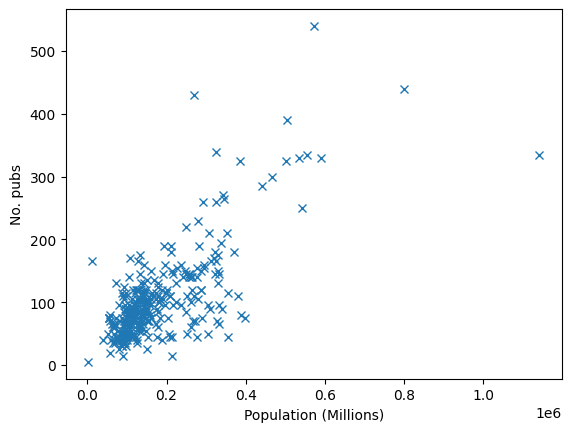

In [15]:
#some preprocessing for the sci kit model
pop = pop.array.reshape(-1,1)
pubs = pubs.array.reshape(-1,1)

#Create scatter plot
plt.plot(pop,pubs,'x')
plt.xlabel('Population (Millions)')
plt.ylabel('No. pubs')
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression 
#We are going to use the LinearRegression model as it looks accurate by eye, and will at least give us positive/negative correlation

In [17]:
#Assign n to length of pop
n = pop.shape[0]
#Create random permutation with length n
p = np.random.permutation(n)
#Create training set size
trainingsize = int(0.8*n)
#Create testing set size
testsize = n - trainingsize
#Create training and test set
train = p[:trainingsize]
test = p[trainingsize:]
#call linear regression model
model = LinearRegression()
#Train model
model.fit(pop[train],pubs[train])
#print MSE
np.mean((pubs[test]-model.predict(pop[test]))**2) 
#Which is pretty good considering the sizes of our numbers.

2646.527767653613

In [18]:
n

323

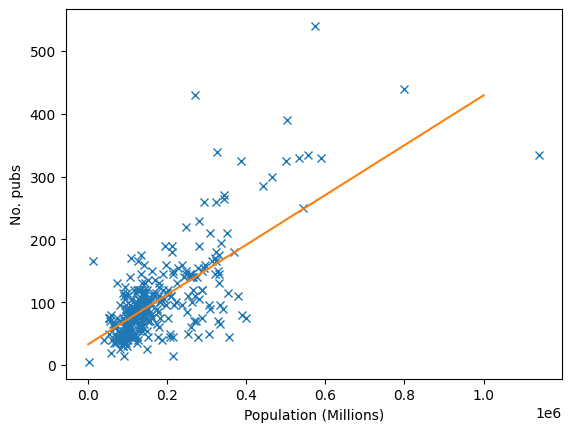

In [19]:
plt.xlabel('Population (Millions)')
plt.ylabel('No. pubs')
#Plot points
plt.plot(pop[:,0],pubs,'x')
#plot linear regression line
plt.plot([0,1000000],[model.intercept_[0],1000000*model.coef_[0,0]+model.intercept_[0]])
#Quite a good match!

In [20]:
print('Predicted linear function: f(x) = ' + str(model.coef_[0,0]) + '*x + ' + str(model.intercept_[0]))
#What we predict the relationship to be 

Predicted linear function: f(x) = 0.00039632632687454166*x + 33.06903776379396


# Task 1.6

In [21]:
#Predicting how many pubs there should be in bath using the model above
predicted_pubs = pd.to_numeric(bath_stats["Population"])*model.coef_[0,0]+model.intercept_[0]
predicted_pubs

21    110.890486
Name: Population, dtype: float64

In [22]:
#How many pubs there are in Bath
bath_stats["No. pubs"].iloc[0]

'160'

In [23]:
float(bath_stats["No. pubs"].iloc[0])-predicted_pubs
#47 more pubs in Bath than expected

21    49.109514
Name: Population, dtype: float64

In [24]:
np.mean(la_stats["No. pubs"])

103.55300859598854

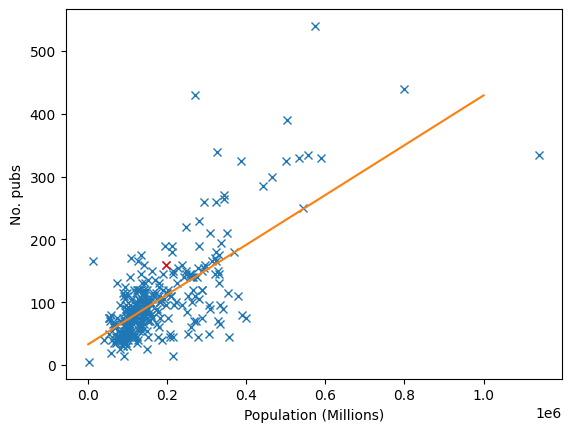

In [25]:
plt.xlabel('Population (Millions)')
plt.ylabel('No. pubs')
plt.plot(pop[:,0],pubs,'x')
plt.plot(pop[:,0][21],pubs[21],'x',c='red')
plt.plot([0,1000000],[model.intercept_[0],1000000*model.coef_[0,0]+model.intercept_[0]])
#From the plot as well, we case see bath is above the line, and also above the 'cluster' of other locations with similar populations.

# Task 1.7

In [26]:
#finding indices of rows that have missing values of income
indices2 = la_stats["Median income"][la_stats["Median income"].isna()].index

In [27]:
#combining with indices of rows with missing No. pubs values
indices2 = indices2.append(la_stats["No. pubs"][la_stats["No. pubs"].isna()].index)

In [28]:
#Singling out the no pubs and income column, but dropping rows with missing values in these columns
pubs2 = la_stats["No. pubs"].drop(labels=indices2)
income = la_stats["Median income"].drop(labels=indices2)

In [29]:
#no null values
income[income.isna()]

Series([], Name: Median income, dtype: float64)

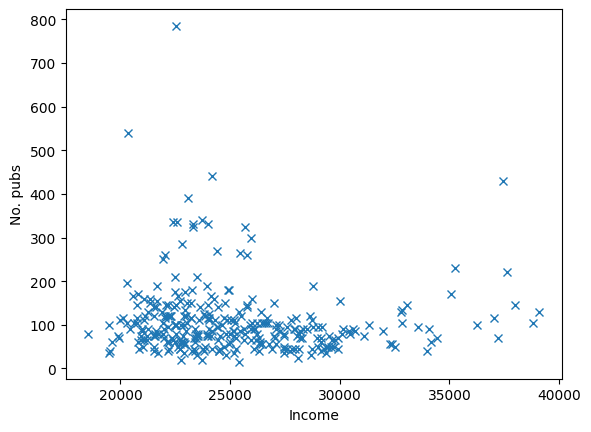

In [30]:
#Plot No. pubs against income.
plt.plot(income,pubs2,'x')
plt.xlabel('Income')
plt.ylabel('No. pubs')
plt.show()

In [31]:
#Make linear regression model
model2 = LinearRegression()
#train model
model2.fit(income.array.reshape(-1,1),pubs2.array.reshape(-1,1))

LinearRegression()

In [32]:
#Preducted function
print('Predicted linear function: f(x) = ' + str(model2.coef_[0,0]) + '*x + ' + str(model2.intercept_[0]))

Predicted linear function: f(x) = -0.001401904837995406*x + 142.8876443412617


Text(0, 0.5, 'No. pubs')

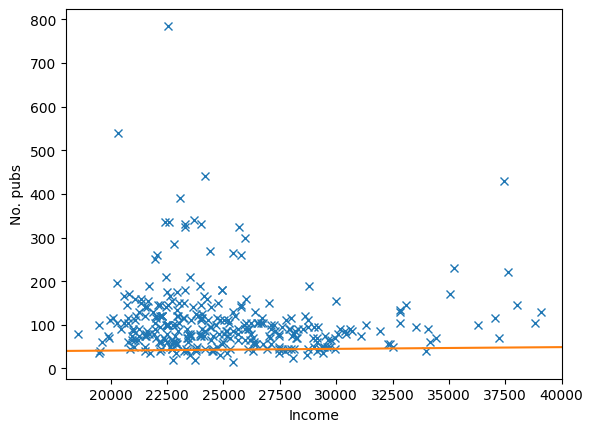

In [33]:
#Scatter plot and line
plt.plot(income,pubs2,'x')
plt.plot([0,40000],[model.intercept_[0],40000*model.coef_[0,0]+model.intercept_[0]])
plt.xlim(18000, 40000)
plt.xlabel('Income')
plt.ylabel('No. pubs')

The line is almost completely flat, showing that there is no positive or negative correlation between median income and No pubs in a geographic region. Also, looking at the plot, visually you can see that there are just less locations with higher income, but the distribution of number of pubs looks about the same.

# Task 1.8 

In [34]:
#finding indices of rows that have missing values of income
indices3 = la_stats["Median income"][la_stats["Median income"].isna()].index
#combining with indices of rows with missing Population values
indices3 = indices3.append(la_stats["Population"][la_stats["Population"].isna()].index)

#Singling out the Population and income column, but dropping rows with missing values in these columns
income2 = la_stats["Median income"].drop(labels=indices3)
pop2 = la_stats["Population"].drop(labels=indices3)


In [35]:
#Start Linear regression model
model3 = LinearRegression()
model3.fit(pop2.array.reshape(-1,1),income2.array.reshape(-1,1))

LinearRegression()

Text(0, 0.5, 'Income')

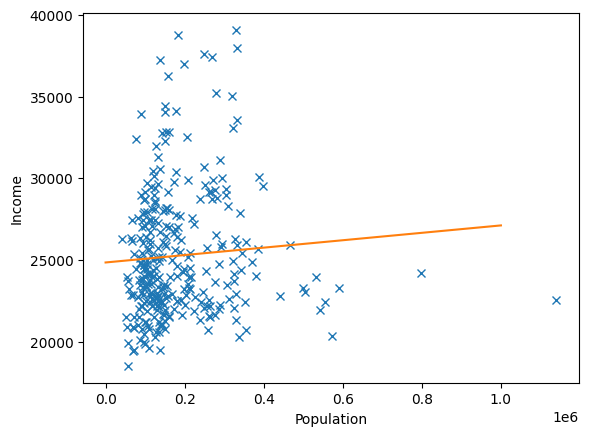

In [36]:
#Create scatter plot
plt.plot(pop2,income2,"x")
#Regression line
plt.plot([0,1000000],[model3.intercept_[0],1000000*model3.coef_[0,0]+model3.intercept_[0]])
plt.xlabel('Population')
plt.ylabel('Income')

So there is a slight positive correlation between population size and income, However most places with signficantly large populations are on the lower end of income, below the mean median income. Places with lower population have much larger deviation in Median income. My theory is that with larger population, the more of a variety of incomes there are (because not everyone can have a super high/low income with so many people) so the median income tends to a value, whearas with lower populations it's easy for a majority high/low income people.

In [37]:
np.mean(la_stats["Median income"])

25257.858974358973

# Task 1.9

In [38]:
#Select required columns from dataframe
X = la_stats[["Population","Median income","No. pubs"]]

In [39]:
la_stats.iloc[X[X["Population"].isna()].index]

,Unnamed: 0,Code,Name,Northing,Easting,Population,No. pubs,Life expectancy (female),Life expectancy (male),Median income
27,27,E06000028,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN
28,28,E06000029,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN
56,56,E07000004,NaN,NaN,NaN,NaN,125.0,NaN,NaN,NaN
57,57,E07000005,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN
58,58,E07000006,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN
59,59,E07000007,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN
87,87,E07000048,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
88,88,E07000049,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN
89,89,E07000050,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN
90,90,E07000051,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN


This is a table of entries with no population metric. As you can see, not just population is missing, but also the location name, Northing, Easting; for some everything except number of pubs is missing. In light of this I think the best decision is to remove these columns rather than replacing missing values with the mean or median.

In [40]:
#find indices of rows with Nan in Population
null_indices = X[X["Population"].isna()].index
#find indices of rows with Nan in No. pubs and append to list
null_indices = null_indices.append(X["No. pubs"][X["No. pubs"].isna()].index)
#find indices of rows with Nan in Median income and append to list
null_indices = null_indices.append(X["Median income"][X["Median income"].isna()].index)


In [41]:
X

,Population,Median income,No. pubs
0,93836.0,22890.0,55.0
1,141285.0,21082.0,65.0
2,137228.0,20973.0,90.0
3,197419.0,23237.0,115.0
4,107402.0,23520.0,80.0
...,...,...,...
345,94832.0,23386.0,40.0
346,95164.0,26071.0,90.0
347,156447.0,23425.0,70.0
348,133030.0,22493.0,175.0


In [42]:
#Drop rows with nan values
X = X.drop(null_indices)

In [43]:
#Convert the dataframe to array and then matrix
X = np.matrix(X.to_numpy())


In [44]:
#Display final matrix
X

matrix([[9.383600e+04, 2.289000e+04, 5.500000e+01],
        [1.412850e+05, 2.108200e+04, 6.500000e+01],
        [1.372280e+05, 2.097300e+04, 9.000000e+01],
        [1.974190e+05, 2.323700e+04, 1.150000e+02],
        [1.074020e+05, 2.352000e+04, 8.000000e+01],
        [1.297590e+05, 2.269500e+04, 5.500000e+01],
        [2.093970e+05, 2.518000e+04, 1.100000e+02],
        [1.500300e+05, 2.126000e+04, 9.000000e+01],
        [1.383810e+05, 1.948600e+04, 1.000000e+02],
        [2.591260e+05, 2.074100e+04, 1.450000e+02],
        [3.432010e+05, 2.441300e+04, 2.700000e+02],
        [1.593640e+05, 2.156600e+04, 8.000000e+01],
        [1.727480e+05, 2.201100e+04, 1.150000e+02],
        [2.110120e+05, 2.396000e+04, 1.900000e+02],
        [2.568140e+05, 2.577400e+04, 1.400000e+02],
        [3.540360e+05, 2.075500e+04, 1.150000e+02],
        [4.047600e+04, 2.630400e+04, 4.000000e+01],
        [3.370980e+05, 2.029900e+04, 1.950000e+02],
        [1.936150e+05, 2.167700e+04, 1.900000e+02],
        [1.8

# 1.10

In [45]:
# convert to array as Kmeans only takes arrays, not matrices
X = np.asarray(X)


In [46]:
#Import kmeans
from sklearn.cluster import KMeans
#create kmeans object with k=3
kmeans = KMeans(3)
kmeans.fit(X)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [47]:
#put cluster centers in centers variable
centers = kmeans.cluster_centers_

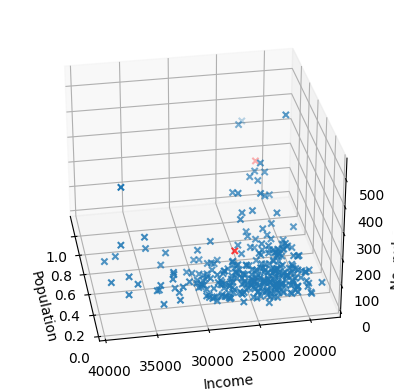

In [48]:
#Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#Plot the points on plot
ax.scatter(X[:,0], X[:,1], X[:,2], marker="x")
#plot the centers in red
ax.scatter(centers[:,0], centers[:,1], centers[:,2],marker='x', c='red') 

ax.set_xlabel('Population')
ax.set_ylabel('Income')
ax.set_zlabel('No. pubs')
ax.view_init(30, 170)

In [49]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([ 79, 215,  10], dtype=int64))

This shows that there are 215 items in cluster 0, 10 in cluster 1, 79 in cluster 2; so cluster 1 is the smallest cluster

In [50]:
#display stats of cluster 1
la_stats.drop(null_indices).iloc[np.where(kmeans.labels_ == 1)[0]]["Name"]

0                Hartlepool
1             Middlesbrough
2      Redcar and Cleveland
3          Stockton-on-Tees
4                Darlington
               ...         
345                 Torfaen
346           Monmouthshire
347                 Newport
348                   Powys
349          Merthyr Tydfil
Name: Name, Length: 215, dtype: object

These are all places with a high population, and most are very central and powerful cities.

In [51]:
la_stats.drop(null_indices).iloc[np.where(kmeans.labels_ == 1)[0]][["Name","Population"]]

,Name,Population
0,Hartlepool,93836.0
1,Middlesbrough,141285.0
2,Redcar and Cleveland,137228.0
3,Stockton-on-Tees,197419.0
4,Darlington,107402.0
...,...,...
345,Torfaen,94832.0
346,Monmouthshire,95164.0
347,Newport,156447.0
348,Powys,133030.0


In [52]:
np.mean(la_stats["Population"])

176642.74613003095

As said above, all places in this cluster have a much higher population than the mean population of an area.

In [53]:
#Gets the vectors for each cluster and groups then into three lists for each group
cluster2 = X[np.where(kmeans.labels_ == 2)[0]]
cluster1 = X[np.where(kmeans.labels_ == 1)[0]]
cluster0 = X[np.where(kmeans.labels_ == 0)[0]]

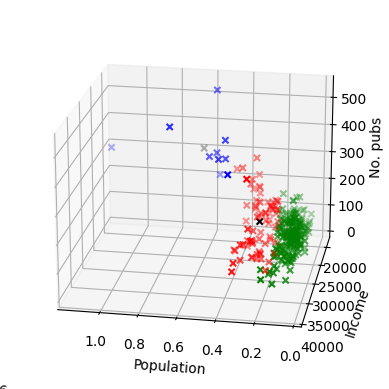

In [54]:
#Create 3d Plot
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')

#plot the 3 clusters in different colours: Cluster 2 in blue, Cluster 1 in green, Cluster 3 in red.
ax2.scatter(cluster2[:,0], cluster2[:,1], cluster2[:,2], c="blue", marker='x')
ax2.scatter(cluster1[:,0], cluster1[:,1], cluster1[:,2], c="green", marker='x')
ax2.scatter(cluster0[:,0], cluster0[:,1], cluster0[:,2], c="red", marker='x')
#plot Centers in black
ax2.scatter(centers[:,0], centers[:,1], centers[:,2],marker='x', c='black') 
ax2.set_xlabel('Population')
ax2.set_ylabel('Income')
ax2.set_zlabel('No. pubs')
ax2.view_init(20, 100)

Again, the green cluster is the smallest and contains all the highest population locations which also have a high number of pubs and lower income.

# Task 2.1

In [55]:
#import networkx
import networkx as nx

In [56]:
#read the two graphs and place them into G1 and G2 respectively
G1 = nx.read_edgelist("graph1.txt") 
G2 = nx.read_edgelist("graph2.txt") 

# Task 2.2

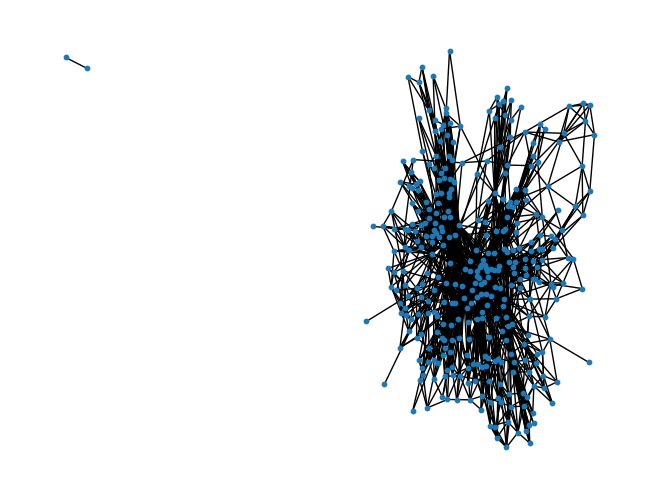

In [57]:
# plot G2
nx.draw(G2, node_size =10)

In [58]:
#find the nodes that make up the small 'Island' component
list(nx.connected_components(G2))[1]

{'293', '51'}

In [59]:
#find local authorities in this component
la_stats.iloc[[51,293]]

,Unnamed: 0,Code,Name,Northing,Easting,Population,No. pubs,Life expectancy (female),Life expectancy (male),Median income
51,51,E06000053,Isles of Scilly,11447.0,91327.0,2226.0,5.0,NaN,NaN,NaN
293,293,E09000001,City of London,181358.0,532382.0,10938.0,165.0,NaN,NaN,NaN


In [60]:
#mean population
np.mean(la_stats["Population"])

176642.74613003095

Both these places have a low population compared to average so it is feasible they could be disconnected from the rest of the graph

In [61]:
# No. nodes in G1
nodes_G1 = len(G1.nodes())
# No. edges in G1
edges_G1 = len(G1.edges())
# Average degree
avg_degree_G1 = 2*edges_G1/nodes_G1
#Calculate average clustering coefficient
clustering_coefficient_G1 = nx.average_clustering(G1)

# No. nodes in G2
nodes_G2 = len(G2.nodes())
# No. edges in G2
edges_G2 = len(G2.edges())
# Average degree
avg_degree_G2 = 2*edges_G2/nodes_G2
#Calculate average clustering coefficient
clustering_coefficient_G2 = nx.average_clustering(G2)

print("Nodes:", nodes_G1)
print("Edges:", edges_G1)
print("Average degree:", avg_degree_G1)
print("Clustering coefficient:", clustering_coefficient_G1,"\n")

print("Nodes:", nodes_G2)
print("Edges:", edges_G2)
print("Average degree:", avg_degree_G2)
print("Clustering coefficient:", clustering_coefficient_G2)

Nodes: 350
Edges: 1842
Average degree: 10.525714285714285
Clustering coefficient: 0.034961490521862024 

Nodes: 350
Edges: 1851
Average degree: 10.577142857142857
Clustering coefficient: 0.5595545045947367


In [62]:
#probably G2 is real

For G1 the average degree is 10.53, so the average of number of edges from all nodes is 10.53. <br>
There are 350 nodes, so for a node to be connected to 10.53 nodes on average p must satisfy: 349*p = 10.52.<br>
So p is around 0.03015, which is very close to the clustering coefficient.<br>
This is a known trait of G(n,p) graphs, that the clustering coefficient is around p, so G1 is looking like the synthetic one.<br>

Additionaly, if G2 was synthetic then p is around 0.56, but it is infeasible to have a disconnected graph with such a high p and n. <br>
The probability of being only having one connection is:
 )


In [63]:
0.56*(1-0.56)**348

4.6743308027687303e-125

# Task 2.3

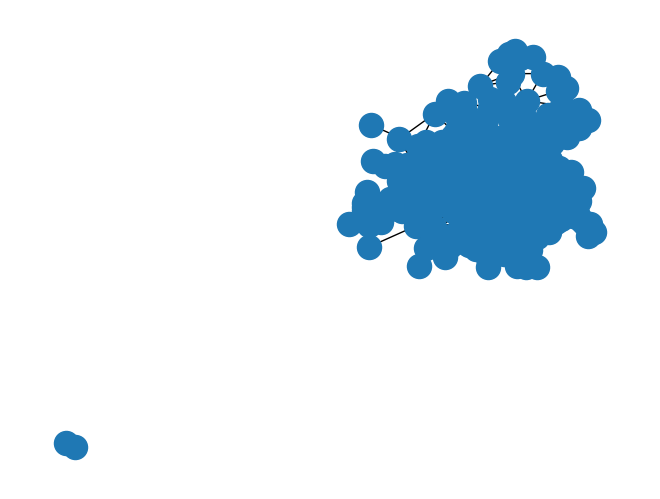

In [64]:
nx.draw(G2)

In [65]:
#find the node indices of the nodes in the main connected component, and find the rows in la_stats with those indices
big_cluster = la_stats.iloc[list(list(nx.connected_components(G2))[0])]
#find the index of the row with the highest northing value
max_index = big_cluster["Northing"].idxmax()

In [66]:
#find the index of the row with the lowest northing value
min_index = big_cluster["Northing"].idxmin()

In [67]:
#display the highest and lowest locations
la_stats.iloc[[max_index,min_index]]

,Unnamed: 0,Code,Name,Northing,Easting,Population,No. pubs,Life expectancy (female),Life expectancy (male),Median income
55,55,E06000057,Northumberland,600699.0,395322.0,323820.0,260.0,82.82,79.48,22046.0
83,83,E07000044,South Hams,54036.0,270676.0,87946.0,115.0,85.25,81.87,20110.0


In [68]:
#Calculate path length between the two points
nx.shortest_path(G2, source = "55", target = "83")


['55', '327', '25', '83']

So the shortest path length(graph distance) is 3

### 

# Task 2.4

This next cell will calculate the real life distance each edge represents for G2, but also for G1 as it is a good comparison to what an unbiased graph may look like since it is random.

In [69]:
#Create list for distances in G2
geographical_distances = []
#go through every edge
for edges in G2.edges():
    #call one node source and the other target
    source = edges[0]
    target = edges[1]
    #calculate distance using D^2 = (X1-X2)^2 + (Y1-Y2)^2
    distance = (la_stats.iloc[int(source)]["Easting"]-la_stats.iloc[int(target)]["Easting"])**2 + (la_stats.iloc[int(source)]["Northing"]-la_stats.iloc[int(target)]["Northing"])**2
    distance = np.sqrt(distance)
    #add distance to list
    geographical_distances.append(distance)

#Create list for distances in G1
geographical_distances2 = []
#go through every edge
for edges in G1.edges():
    #call one node source and the other target
    source = edges[0]
    target = edges[1]
    #calculate distance using D^2 = (X1-X2)^2 + (Y1-Y2)^2
    distance = (la_stats.iloc[int(source)]["Easting"]-la_stats.iloc[int(target)]["Easting"])**2 + (la_stats.iloc[int(source)]["Northing"]-la_stats.iloc[int(target)]["Northing"])**2
    distance = np.sqrt(distance)
    #add distance to list
    geographical_distances2.append(distance)

(array([1.258e+03, 2.010e+02, 7.000e+01, 7.100e+01, 1.500e+01, 3.100e+01,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([  2168.53545048,  49216.81291615,  96265.09038182, 143313.36784748,
        190361.64531315, 237409.92277881, 284458.20024448, 331506.47771015,
        378554.75517581, 425603.03264148, 472651.31010714]),
 <BarContainer object of 10 artists>)

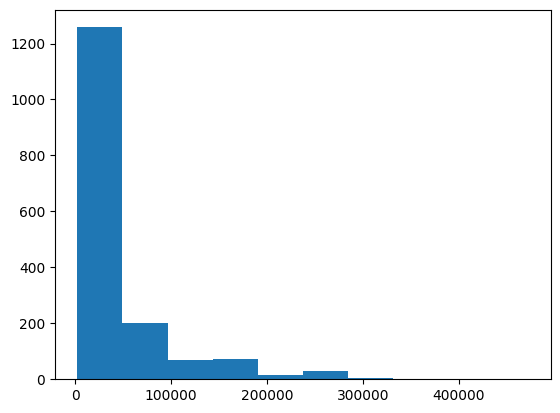

In [70]:
plt.hist(geographical_distances)

(array([222., 289., 304., 336., 221., 133.,  44.,  16.,   7.,   1.]),
 array([  7714.32751444,  69980.24778927, 132246.16806411, 194512.08833895,
        256778.00861379, 319043.92888862, 381309.84916346, 443575.7694383 ,
        505841.68971314, 568107.60998797, 630373.53026281]),
 <BarContainer object of 10 artists>)

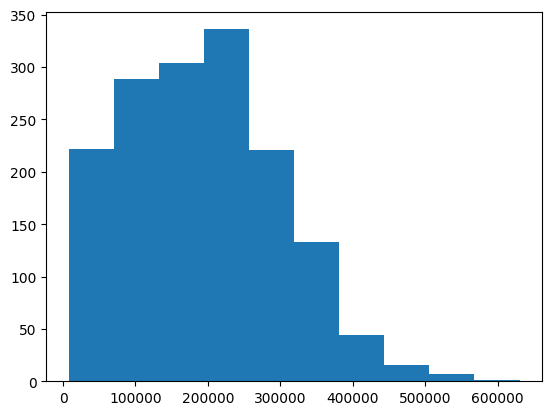

In [71]:
plt.hist(geographical_distances2)

Looking at these two histograms, it is obvious that the real world one is skewed so that the majority of edges represent a small distance, i.e. nodes are connected to nodes closer to them. This is evidence that the hypothesis is true.

Now I am going to plot a graph, but each node is where it should be relevant to each other

In [72]:
#Create list that will store Easting, Northing pairs of coordinates for all nodes
coord_list = []
for i in range(0,350):
    #create tuple pair and append to list
    coord_list.append((la_stats["Easting"].iloc[i], la_stats["Northing"].iloc[i]))

#create dictionary of positions that can be read by nx.draw()
pos = {str(i):coord_list[i] for i in range(0,350)}
#{'0': (east,north) , '1': (east2,north2) , ......}

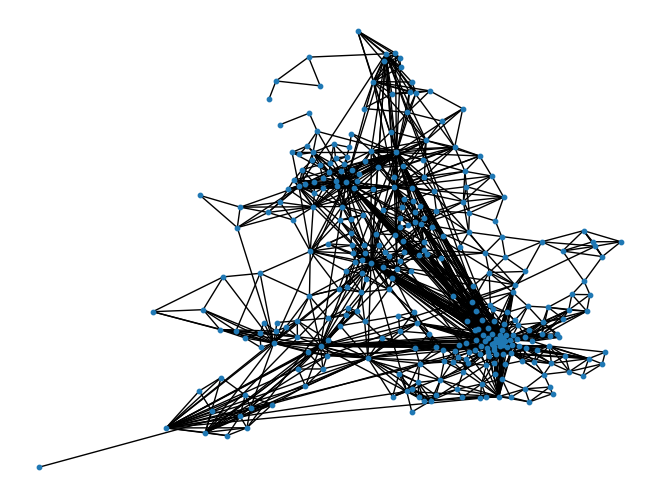

In [73]:
#plot graph G2
nx.draw(G2, pos=pos, node_size=10)

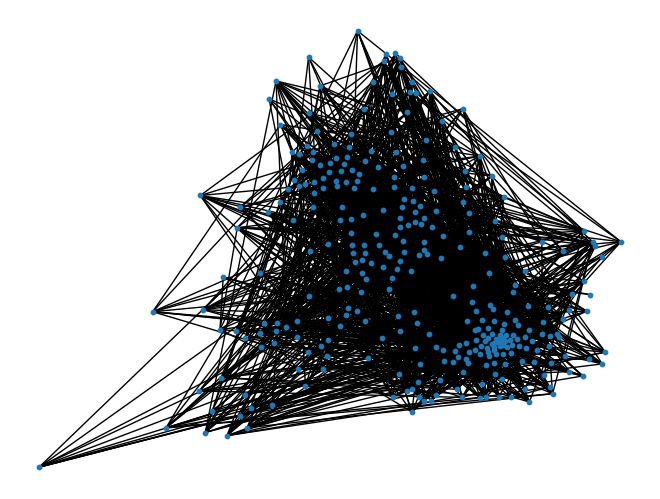

In [74]:
#Plot graph G1
nx.draw(G1, pos=pos, node_size=10)

The plot of G2 looks like the UK, all paths and edges stay in land mainly, and it is very visable that nodesare connected to nodes closer to them. <br>
Additionaly, in the random G2 plot it is not seen that nodes are connected to nodes closer to them, highlighting the difference between them.
This is big evidence that nodes in G2 tend to be more connected to nodes closer to them physically, backing the hypothesis “people
tend to move between areas that are geographically close” <br>
Overall I conclude that the hypothesis is true by the evident above..

# Task 3.1

In [75]:
def f(p,q,r):
    if len(r) == 0:
        r.append(("1","10"))
        r.append(("1","11"))
        r = f(0,q-1,r)
        r = f(1,q-1,r)
    elif q>0:
        r.append((r[p][1],r[p][1]+"0"))
        r.append((r[p][1],r[p][1]+"1"))
        p = len(r)-2
        r = f(p,q-1,r)
        r = f(p+1,q-1,r)
    return(r)
def surprise(n):
    return(f(0,n,[]))

In [76]:
surprise(1)
#add 4,8,16

[('1', '10'), ('1', '11')]

In [77]:
surprise(2)

[('1', '10'),
 ('1', '11'),
 ('10', '100'),
 ('10', '101'),
 ('11', '110'),
 ('11', '111')]

Surprise(n) generates list of binary strings in pairs ('a','b'), where all numbers from 1 to 2^(n+1)-1 are in 'a' and 'b'. 
'b' is always either double 'a' or double 'a'+1. The list is called r.<br>
<br>
Initially, no matter what n is the pairs ("1","10") and ("1","11") are both appended to the empty list r as len(r) = 0, so we run the two append commands in the if branch.<br> Every time that f(p,q,r) is called recursively two more pairs are appended to r by the two r.append() statements in the elif branch. The number of pairs in the final list is the sum from 1 to n of: 2^n.<br>
<br>
In each pair of pairs ('a1','b1'),('a2','b2') that is added, 'b1' is always 'a1' with an extra 0 at the end, 'b2' is always 'a2' with an extra 1 at the end. This is seen in the append function arguements. 'a1' is always the same as the second number in the second to last pair in the list at the time of adding, and 'a2' is always the second number of the pair after that. This is because of the line, p = len(r)-2 , and p dictates what pairs 'a1' and 'a2' are built off of. 'len(r)-2' refers to the penultimate item in the list.

# Task 3.2

In [78]:
print(len(surprise(1)), len(surprise(2)), len(surprise(3)), len(surprise(4)), len(surprise(5)), len(surprise(6)))

2 6 14 30 62 126


From what is seen above, each time n increases 2^n pairs are added to the previous n output. So len(surprise(n)) = 2^n + len(surprise(n-1)). <br>
The length is directly tied to computation complexity as the length is the number of "append" commands performed. <br>
So, len(surprise(n)) =  2 + 2^2 + ... + 2^n = 2^(n+1)-2 , Which is also the number of appends and so complexity is O2^n).
n
 )


Computation complexity is O(2^n)

The reason why length of surprise(n) rises like this is because each running of the function 'f' recursively runs two more instances of the function, which each run 2 more instances n times. So the number of times the function is run is run is 1 + 2 + 2^2 + ... + 2^n , again showing us the exponential order as each running of the function causes 2 append commands.

This is with the assumption the computational complexity order of .append() is 1.